In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip


# Data Exploration 

In [5]:
# Load the dataset
file ="/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip"
df = pd.read_csv(file)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
# Information of the dataset 
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None


In [7]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [8]:
# Important libraries for Data Distribution 
import matplotlib.pyplot as plt 
import seaborn as sns 


Label Counts:
toxic            15294
obscene           8449
insult            7877
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


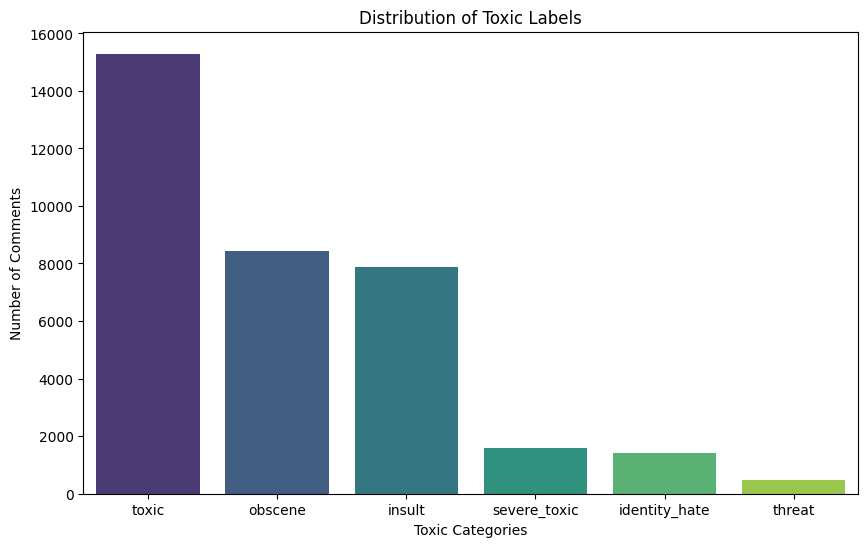

In [9]:
# Data distribution of label counts 
Label_columns = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

# Count total occurences of each label 
label_counts = df[Label_columns].sum().sort_values(ascending=False)
print("\nLabel Counts:")
print(label_counts)

# Plot the label distribution
plt.figure(figsize=(10,6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title("Distribution of Toxic Labels")
plt.xlabel("Toxic Categories")
plt.ylabel("Number of Comments")
plt.show()

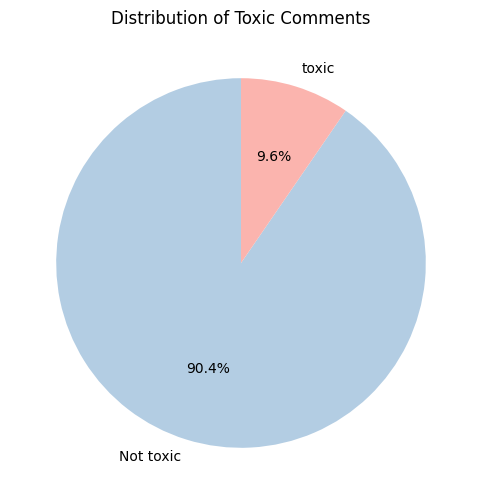

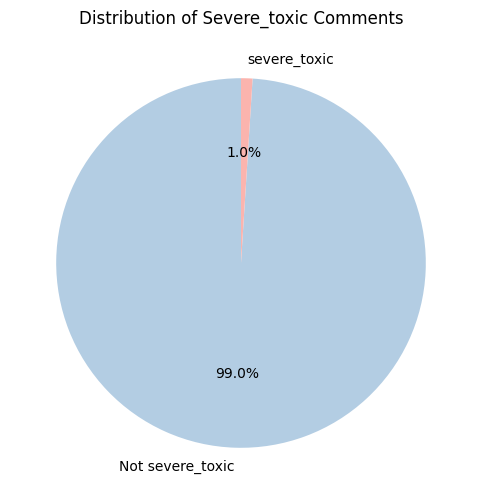

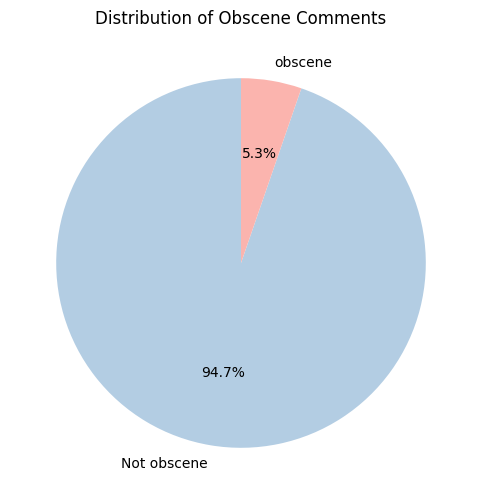

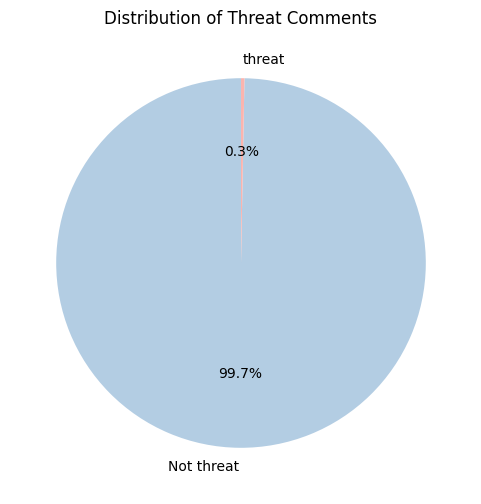

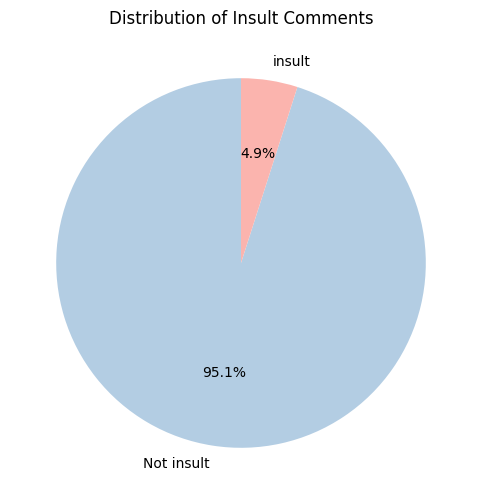

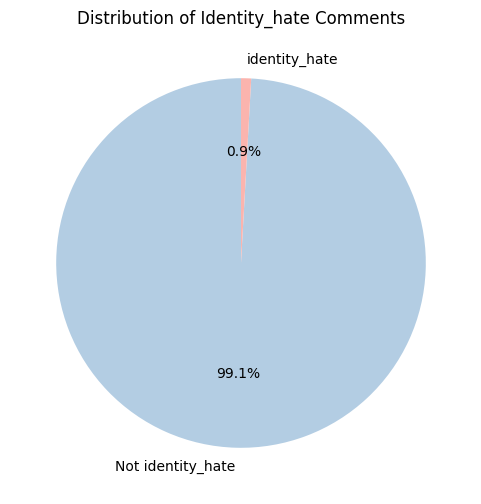

In [10]:
# Pie Chart for 
for label in Label_columns:
    plt.figure(figsize=(6, 6))
    counts = df[label].value_counts()
    labels = ['Not ' + label, label]
    plt.pie(
        counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#b3cde3', '#fbb4ae']
    )
    plt.title(f'Distribution of {label.capitalize()} Comments')
    plt.show()

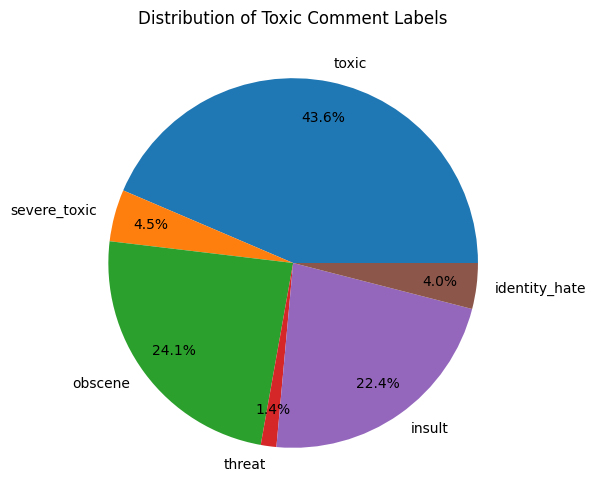

In [11]:
temp = {}
# Count number of each category of comment
for x in df.columns[2:]:
    temp[x] = df[x].sum()

# Plot the pie chart
plt.figure(figsize=(7, 6))
plt.pie(
    temp.values(),
    labels=temp.keys(), 
    autopct='%1.1f%%', 
    pctdistance=0.80
)
plt.title('Distribution of Toxic Comment Labels')
plt.show()

In [12]:
# Count of Multi-label comment 
df['Multi_labele_comment'] = df[Label_columns].sum(axis=1)

print(f"Multi label comments : {(df['Multi_labele_comment'] > 1).sum()}")


Multi label comments : 9865


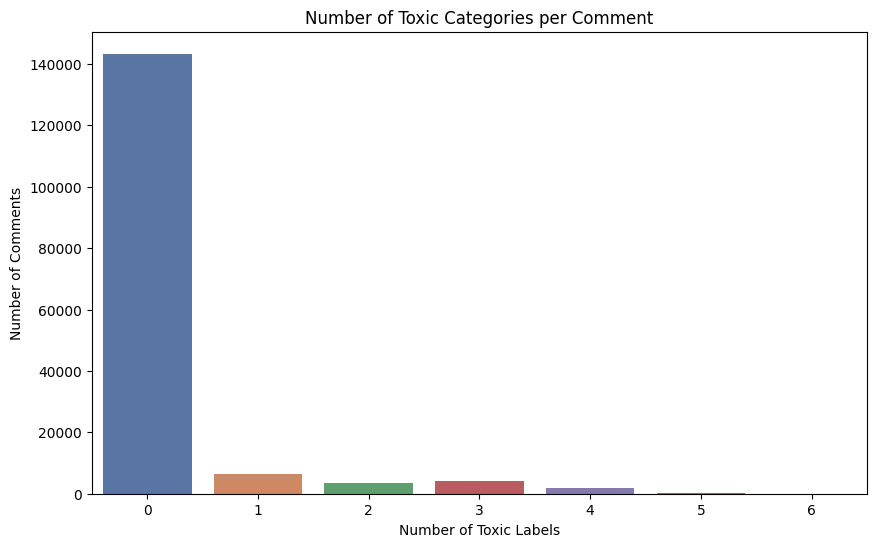

In [13]:
# Check the number of multi-label comments 
df['multi_lable_count'] = df[Label_columns].sum(axis=1)
multi_label_distribution = df['multi_lable_count'].value_counts().sort_index()

# Plot multi-label distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=multi_label_distribution.index, y=multi_label_distribution.values, palette="deep")
plt.title("Number of Toxic Categories per Comment")
plt.xlabel("Number of Toxic Labels")
plt.ylabel("Number of Comments")
plt.show()

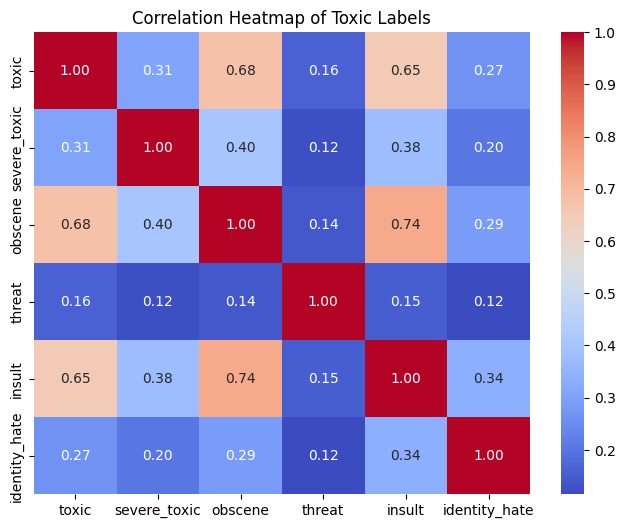

In [14]:
# Correlation heatmap for the toxic labels 
plt.figure(figsize=(8, 6))
sns.heatmap(df[Label_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Toxic Labels")
plt.show()

### Text Analysis 

In [15]:
# Average comment lengths (character, words)

df['char_length'] = df['comment_text'].apply(len)
df['word_length'] = df['comment_text'].apply(lambda x: len(x.split()))

avg_char_length = df['char_length'].mean()
avg_word_length = df['word_length'].mean()

print(f"Average Comment Length (Characters): {avg_char_length:.2f}")
print(f"Average Comment Length (Words): {avg_word_length:.2f}")

Average Comment Length (Characters): 394.07
Average Comment Length (Words): 67.27


Word Cloud:
- A word cloud is a visual representation of text data, where the size of each word indicates its frequency or importance in the text. It's a simple and intuitive way to visualize and analyze large amounts of text. 

For this project:
- A toxic word cloud might highlight words like "hate","stupid", or "kill".
- A non-toxic word cloud might emphasize words like "love", "thank", "happy"

In [16]:
# Important library 
from wordcloud import WordCloud

In [17]:
from wordcloud import WordCloud

def plot_wordcloud(column_name, width=720, height=520):

    if column_name not in df.columns[2:8]:
        print(f"Column '{column_name}' does not exist in the DataFrame.")
        return
    
    text = ' '.join(df[df[column_name] == 1]['comment_text'])
    wordcloud_ = WordCloud(width=width, height=height, background_color='black').generate(text)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud_, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {column_name} Comments')
    plt.show()

    word_frequencies = wordcloud_.words_

    # Top 20 Words used in toxic comments
    words = pd.DataFrame(word_frequencies, index=[0]).T[:20]
    words.reset_index(inplace=True)
    words.rename(columns={0:'Normalized Frequencies', 'index':'Word'}, inplace=True)
    words['Normalized Frequencies'] = words['Normalized Frequencies'] * 100
    print(f'Top 20 words used in {column_name} comments:')
    print(words.head(20))

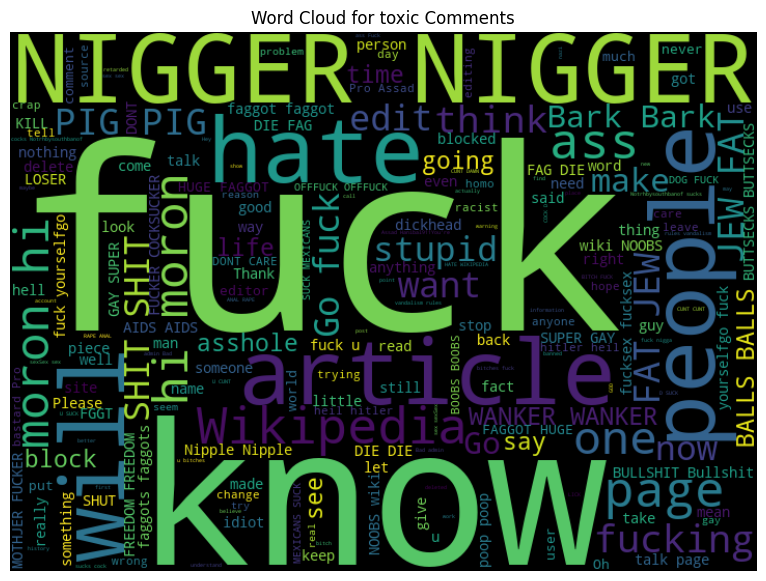

Top 20 words used in toxic comments:
             Word  Normalized Frequencies
0            fuck              100.000000
1            know               54.105534
2   NIGGER NIGGER               51.866152
3         article               46.460746
4            hate               46.332046
5          people               44.736165
6            will               44.272844
7       Wikipedia               41.956242
8            page               40.926641
9             ass               40.592021
10       moron hi               37.966538
11       hi moron               37.889318
12            one               37.039897
13        fucking               35.649936
14          think               33.101673
15        PIG PIG               32.149292
16        JEW FAT               31.763192
17        FAT JEW               31.557272
18           want               30.296010
19           edit               30.141570


In [18]:
plot_wordcloud("toxic")

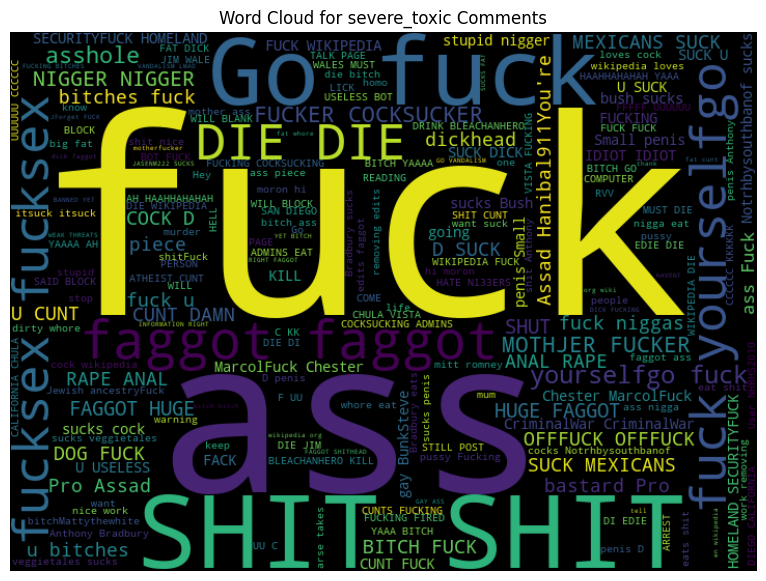

Top 20 words used in severe_toxic comments:
                 Word  Normalized Frequencies
0                fuck              100.000000
1                 ass               58.735632
2           SHIT SHIT               57.471264
3             Go fuck               53.045977
4       faggot faggot               40.977011
5             DIE DIE               36.321839
6     fucksex fucksex               35.804598
7     fuck yourselfgo               35.689655
8     yourselfgo fuck               35.689655
9             asshole               30.172414
10     MOTHJER FUCKER               28.103448
11  FUCKER COCKSUCKER               28.103448
12      NIGGER NIGGER               25.689655
13        HUGE FAGGOT               23.908046
14        FAGGOT HUGE               23.908046
15               SHUT               23.333333
16             fuck u               21.551724
17    OFFFUCK OFFFUCK               20.632184
18      MEXICANS SUCK               20.459770
19      SUCK MEXICANS               

In [19]:
plot_wordcloud("severe_toxic")

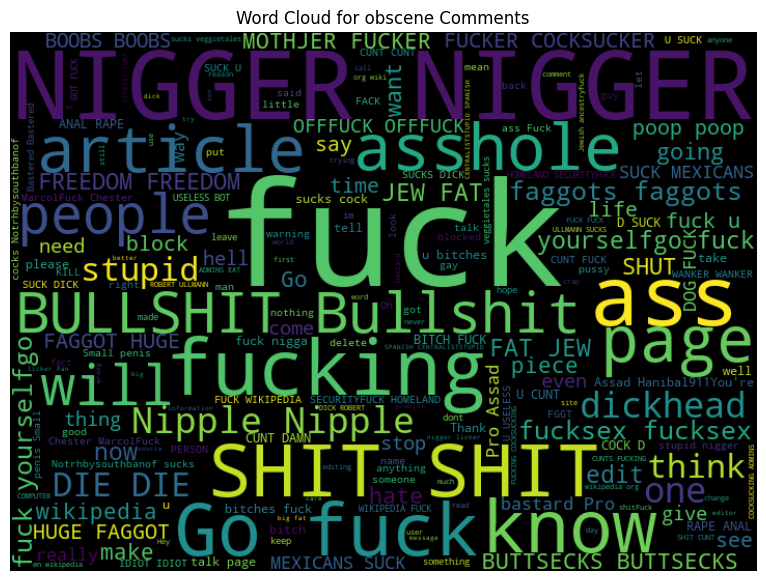

Top 20 words used in obscene comments:
                 Word  Normalized Frequencies
0                fuck              100.000000
1       NIGGER NIGGER               60.601504
2                 ass               44.751880
3             fucking               38.045113
4           SHIT SHIT               34.436090
5                know               34.225564
6             Go fuck               33.744361
7             asshole               26.165414
8             article               25.954887
9                page               25.413534
10  BULLSHIT Bullshit               24.992481
11               will               24.781955
12             people               22.947368
13      Nipple Nipple               22.947368
14                one               21.293233
15           dickhead               21.293233
16              think               19.248120
17            DIE DIE               19.248120
18             stupid               18.766917
19    faggots faggots               18.76

In [20]:
plot_wordcloud("obscene")

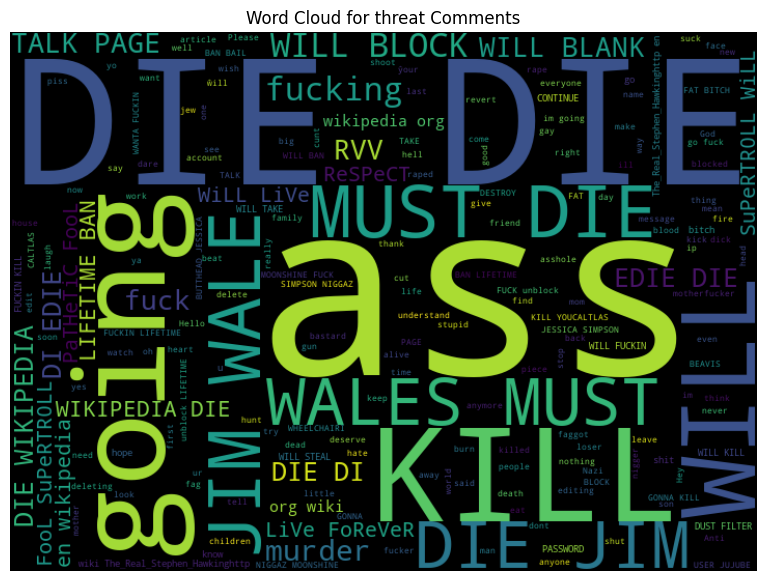

Top 20 words used in threat comments:
             Word  Normalized Frequencies
0             ass              100.000000
1         DIE DIE               82.942708
2            KILL               39.973958
3           going               36.458333
4            WILL               23.697917
5        MUST DIE               20.833333
6        JIM WALE               20.572917
7      WALES MUST               20.312500
8         DIE JIM               20.312500
9      WILL BLOCK               19.401042
10        fucking               17.968750
11         murder               13.932292
12      TALK PAGE               13.151042
13            RVV               12.500000
14           fuck               12.239583
15     WILL BLANK               12.239583
16         DIE DI               11.718750
17        DI EDIE               11.718750
18       EDIE DIE               11.718750
19  DIE WIKIPEDIA               11.588542


In [21]:
plot_wordcloud("threat")

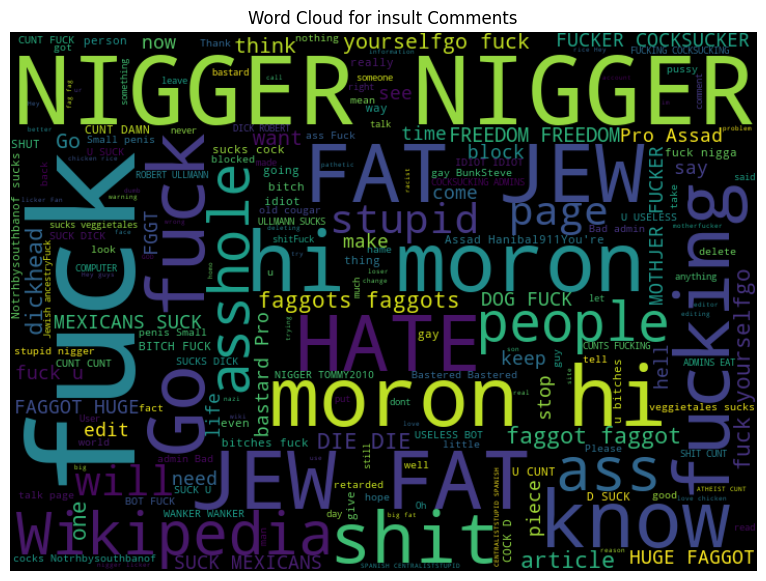

Top 20 words used in insult comments:
             Word  Normalized Frequencies
0            fuck              100.000000
1   NIGGER NIGGER               66.888715
2        moron hi               49.882445
3        hi moron               49.764890
4         JEW FAT               48.354232
5         FAT JEW               48.040752
6            know               44.083072
7            HATE               43.377743
8         Go fuck               42.985893
9         fucking               40.948276
10           shit               36.677116
11      Wikipedia               36.363636
12            ass               35.971787
13        asshole               32.484326
14         people               30.211599
15         stupid               30.172414
16           will               29.858934
17           page               29.271160
18  faggot faggot               28.056426
19       dickhead               27.547022


In [22]:
plot_wordcloud("insult")

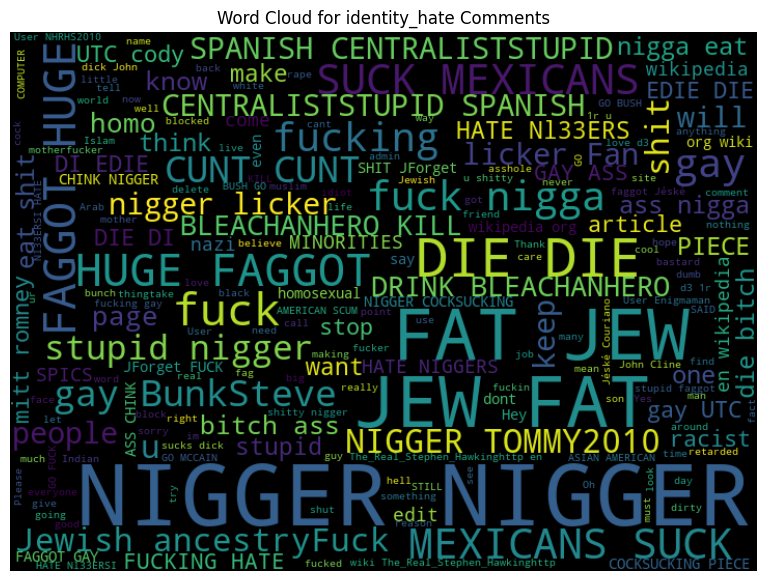

Top 20 words used in identity_hate comments:
                        Word  Normalized Frequencies
0              NIGGER NIGGER              100.000000
1                    JEW FAT               64.913204
2                    FAT JEW               64.492372
3                    DIE DIE               33.350868
4                HUGE FAGGOT               22.041031
5                FAGGOT HUGE               21.883219
6                       fuck               21.725408
7              MEXICANS SUCK               18.726986
8              SUCK MEXICANS               18.674382
9                 fuck nigga               17.727512
10                       gay               17.517096
11                   fucking               16.570226
12             gay BunkSteve               14.571278
13                 CUNT CUNT               14.518674
14             stupid nigger               12.730142
15          NIGGER TOMMY2010               11.888480
16       Jewish ancestryFuck               10.941610
1

In [23]:
plot_wordcloud("identity_hate")

# Text Processing

### Basic Cleanup 

In [24]:
# Important libraries 
import re
from nltk.corpus import stopwords 
import nltk 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
# Define the stopwords list 
stop_words = set(stopwords.words('english'))

# Function to clean the text
def clean_text(text):
    # Remove special characters and punctuation using regex 
    text = re.sub(r'[^a-zA-Z\s]','',text)
    # Convert text to lowercase 
    text =  text.lower()
    # Tokenize and remove stopwords 
    words = text.split()
    words = [word for word in words if word not in stop_words]
    # Join words back into a single string 
    return ' '.join(words)

# Apply the cleaning fucntion to the comment_text column 
df['cleaned_comment_text'] = df['comment_text'].apply(clean_text)

# Display a sample of the cleaned text 
print("Original Text:")
print(df['comment_text'].iloc[0])
print("\nCleaned Text:")
print(df['cleaned_comment_text'].iloc[0])

Original Text:
Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27

Cleaned Text:
explanation edits made username hardcore metallica fan reverted werent vandalisms closure gas voted new york dolls fac please dont remove template talk page since im retired


In [26]:
# The dataset with the new column 'cleaned commen text' which are toxic comments
df[df['toxic']== 1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Multi_labele_comment,multi_lable_count,char_length,word_length,cleaned_comment_text
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4,4,44,8,cocksucker piss around work
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0,1,1,319,53,hey talk exclusive group wp talibanswho good d...
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0,1,1,57,10,bye dont look come think comming back tosser
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,4,4,648,117,gay antisemmitian archangel white tiger meow g...
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,3,3,40,8,fuck filthy mother ass dry
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1,4,4,1677,319,previous conversation fucking shit eating libe...
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0,2,2,33,6,mischievious pubic hair
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0,3,3,346,58,absurd edits absurd edits great white shark to...
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0,2,2,534,103,hey listen dont ever delete edits ever im anno...


In [27]:
# Analyze unique words in each toxicity category 
# Important libraries
from collections import Counter

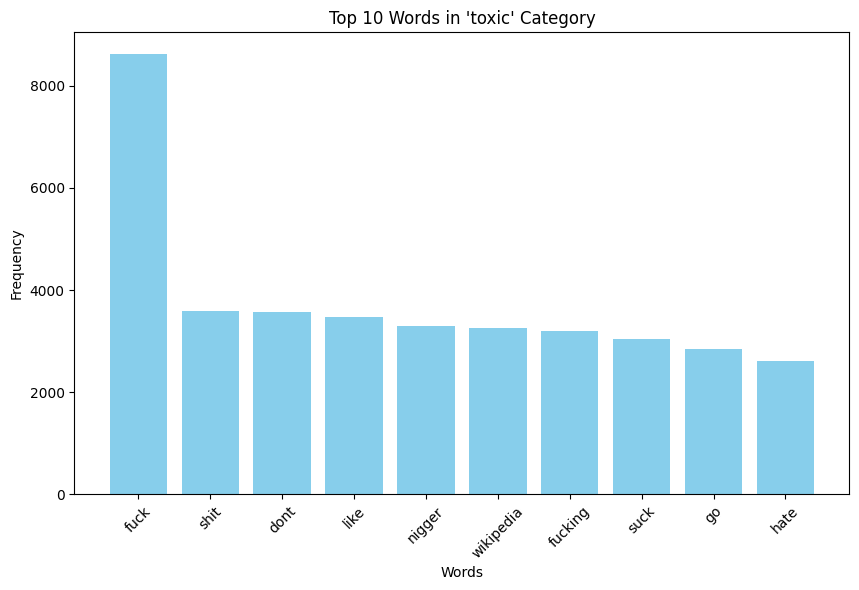

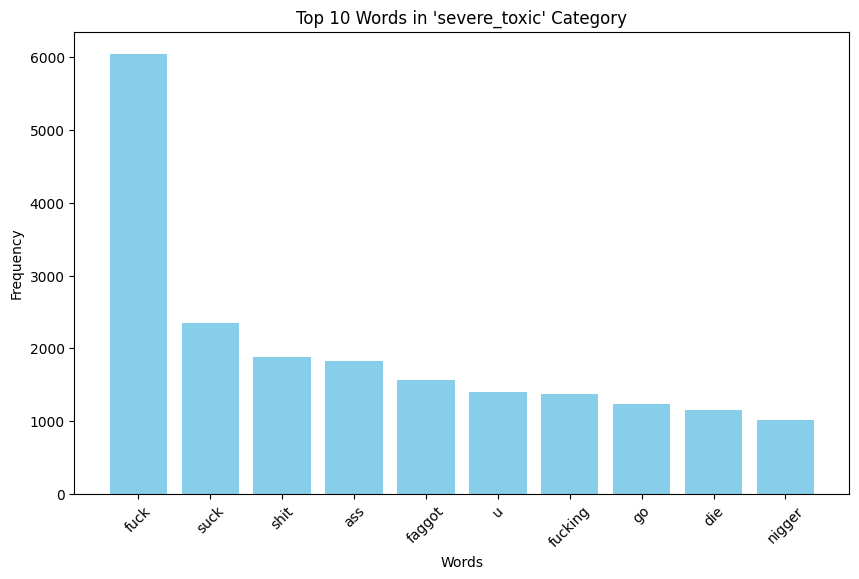

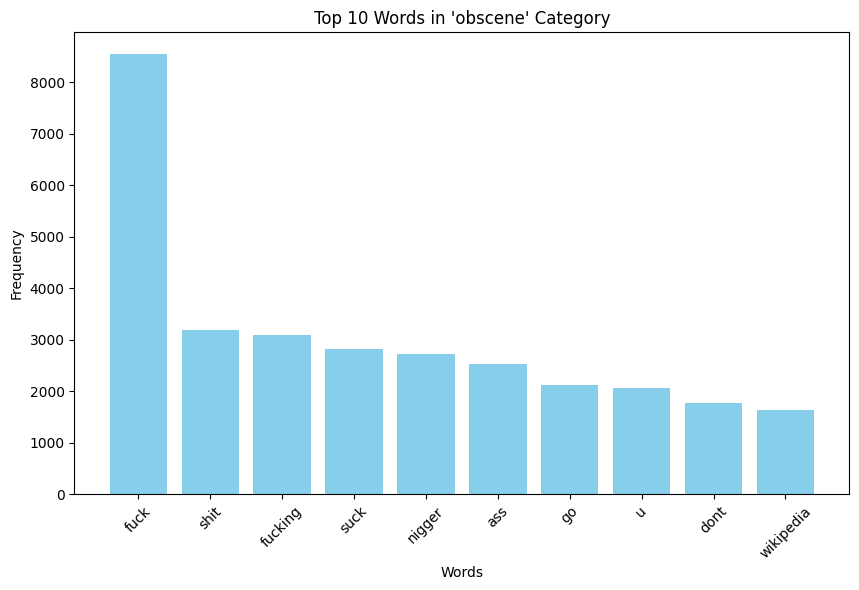

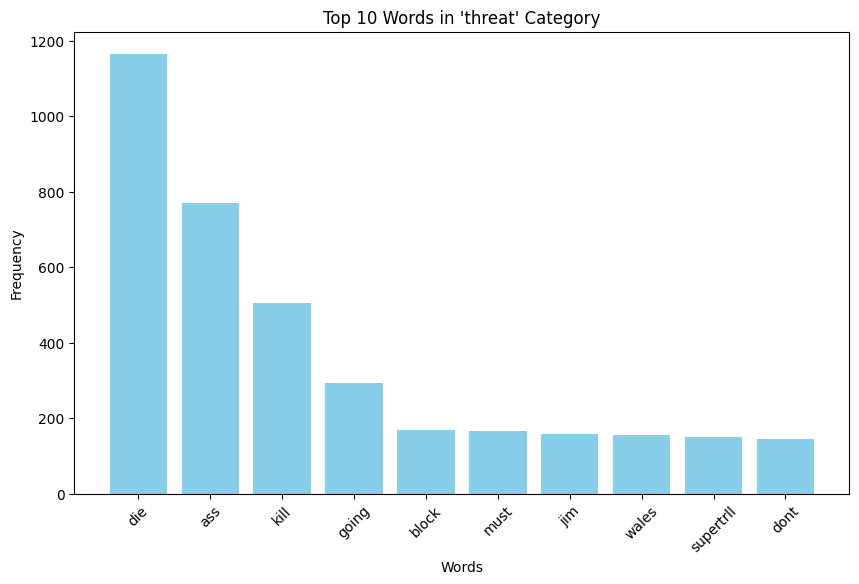

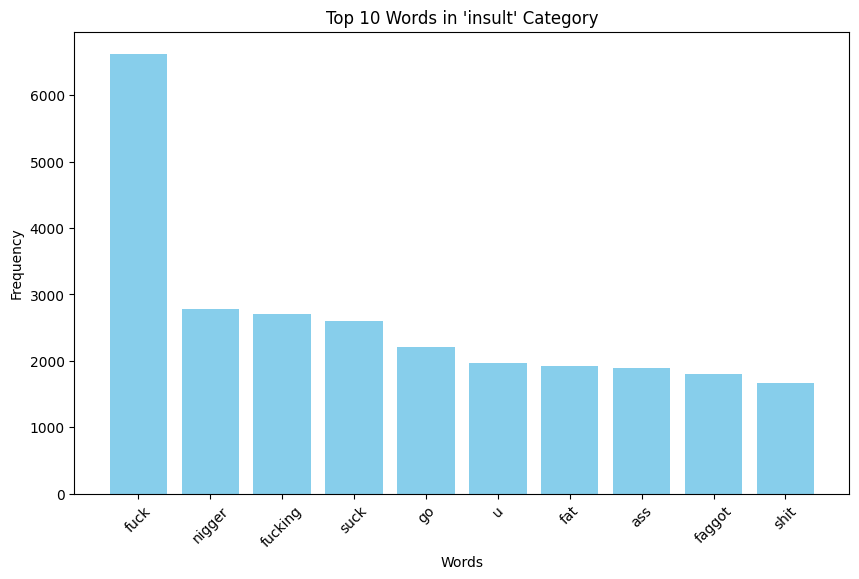

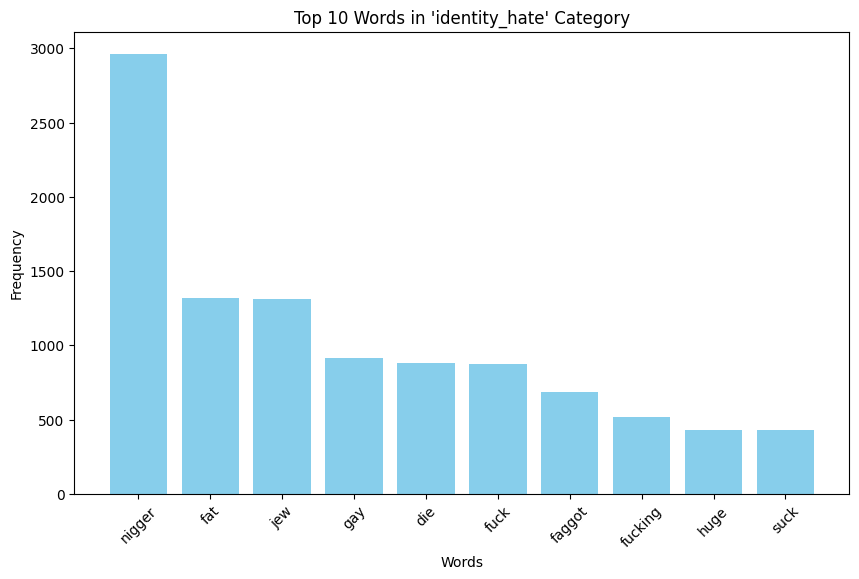

In [28]:
# Function to get unique words from comments in a specific category
def get_unique_words(comments):
    # Split all comments into words
    all_words = " ".join(comments).split()
    # Count the frequency of each word
    return Counter(all_words)  

# Analyze unique words in each toxicity category
unique_words_per_category = {} 

for label in Label_columns:
    # Filter comments for the label
    category_comments = df[df[label] == 1]['cleaned_comment_text']  
    word_counts = get_unique_words(category_comments)
    # Ensure the variable name is consistent
    unique_words_per_category[label] = word_counts 

# Display and visualize the top 10 unique words for each category
for label, word_counts in unique_words_per_category.items():
    # Check if there are enough words in the category
    if len(word_counts) > 0:
        # Get the top 10 words and their counts
        top_words = word_counts.most_common(10)
        # Unpack into separate lists for words and counts
        words, counts = zip(*top_words) 
        
        # Plot the bar chart
        plt.figure(figsize=(10, 6))
        plt.bar(words, counts, color='skyblue')
        plt.title(f"Top 10 Words in '{label}' Category")
        plt.xlabel("Words")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"No words available for category: {label}")

- For NLP tasks, XGBoost doesn't work directly on raw text data. The text needs to be converted into numerical representations using technique such as TF - IDF. 

- We have already preprocessed the text remove special characters, stopwords, and lowercase).

- TF-IDF is a statistical measure used in text processing to evaluate how important a word is to a document relative to the entire dataset. 

Why TF-IDF is important for Xgboost?
Because cannot work directly with text data, as it requires numerical features. 
- word importance: TF_IDF ensures that rare but important words in toxic comments (like "hate", "kill", "stupid") get higher weights, while common words have lower weights

In [32]:
# important library 
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer 
tfidf = TfidfVectorizer(max_features=10000)

# Convert text data to numerical TF-IDF features 
X = tfidf.fit_transform(df['cleaned_comment_text'])

# Check the shape of the TF-IDF matrix 
print(f"TF-IDF Matrix Shape: {X_tfidf.shape}")

TF-IDF Matrix Shape: (159571, 10000)


### XGBoost
XGBoost is a powerful and efficient implementation of gradient boosting. It works by creating an ensemble of decision trees, where each tree corrects the errors of the previous ones. It is widely used for both classification and regression problems due to its performance and flexibility. 

- Split the dataset into training and testing sets (for now just to check if the model is giving good results)
- Train an XGBoost model for each toxicity label
- Evaluate the model using metrics such accuracy, F1-score, precision, and recall.

For each label, XGBoost builds decision tress to classify comments as toxic or non-toxic.
TF-IDF ensures that the text is converted into features XGBoost can use. 


In [33]:
# Import libraries 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import xgboost as xgb 

# Train an XGBoost model for each label
for label in Label_columns:
    print(f"\nTraining model for {label}...\n")

    # Prepare the target 
    y = df[label]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Train the XGBoost model 
    model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        max_depth=6,
        learning_rate=0.1,
        n_estimators=100,
        random_state=42
    )

    model.fit(X_train, y_train)

    # Make predictions 
    y_pred = model.predict(X_test)

    # Evaluate the model 
    print(f"Classification Report for {label}:")
    print(classification_report(y_test, y_pred))



Training model for toxic...

Classification Report for toxic:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     28856
           1       0.94      0.46      0.62      3059

    accuracy                           0.95     31915
   macro avg       0.94      0.73      0.80     31915
weighted avg       0.95      0.95      0.94     31915


Training model for severe_toxic...

Classification Report for severe_toxic:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31596
           1       0.54      0.17      0.25       319

    accuracy                           0.99     31915
   macro avg       0.77      0.58      0.62     31915
weighted avg       0.99      0.99      0.99     31915


Training model for obscene...

Classification Report for obscene:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     30225
           1       0.90      0

- Precision: the percentage of predicted positive instances that are correct.
  - higher precision means fewer false positives
- Recall: The percentage of actual positive instances that are correctly identitfied.
  - High recall means fewer false positives
- F1-Score: The harmonic mean of precision and recall
  - Balances the trade-off between precision and recall
- Support: The number of samples for each class
  - Imbalance in support impacts metrics like recall and F1-Score.

#### Data analysis based on the results we got from training XGBoost model
1. Toxic Comments
   - Precision: 0.94 for toxic comments
   - Recall: 0.46, meaning nearly half of actual toxic comments are missed.
   - Class imbalance (3059 toxic vs. 28856 non-toxic) affects recall.
2. Severe Toxic Comments
   - Precision: 0.54, but recall is only 0.17.
   - Severe toxic comments are highly underrepresented (319 severe toxic vs. 31596 non-severe toxic), leading the poor performance in identifying them. 
3. Obscene Comments
   - Precision: 0.90 for obscene comments
   - Recall: 0.64, meaning the model identifies 64% of actual obscene comments.
   - Better balance between precision and recall compared to severe toxic, likely due to more samples (1690 obscene).
4. Threat Comments
   - Precision: 0.48, recall is 0.15.
   - Reason: Extremely imbalanced class, 96 threat vs. 31819 non-threat).
5. Insult Comments
   - Precision: 0.79, recall is 0.47.
   - The F1-Score (0.59) indicates that while precision is decent, the recall is poor due to imbalanced data (1575 insults vs. 30340 non-insults).
6. Identity Hate Comments
   - Precision: 0.75, recall is 0.17


Feature Importance for Label: Toxic

Top Features:
fuck: 0.0313
bitch: 0.0228
fucking: 0.0192
dick: 0.0182
suck: 0.0159
asshole: 0.0150
faggot: 0.0141
shit: 0.0134
gay: 0.0132
ass: 0.0131
idiot: 0.0128
cock: 0.0123
pathetic: 0.0119
fat: 0.0118
article: 0.0117
fag: 0.0116
jerk: 0.0107
stupid: 0.0102
fucker: 0.0100
bastard: 0.0095


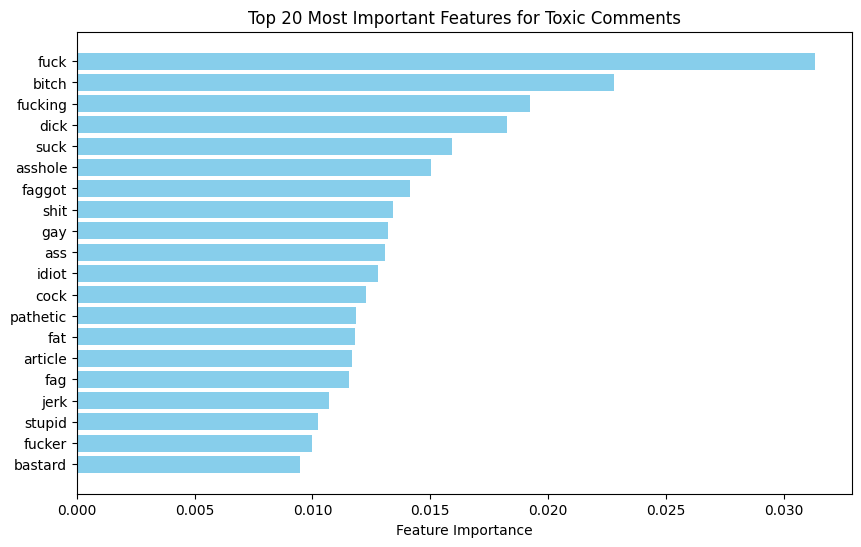


Feature Importance for Label: Severe_toxic

Top Features:
fuck: 0.0372
fucker: 0.0210
cock: 0.0204
penis: 0.0179
fucking: 0.0171
fat: 0.0170
filthy: 0.0154
fuk: 0.0146
fuckin: 0.0130
shoot: 0.0127
please: 0.0123
bitch: 0.0121
motherfucking: 0.0119
suck: 0.0118
faggot: 0.0112
rape: 0.0112
die: 0.0108
nigger: 0.0105
bastard: 0.0105
dick: 0.0100


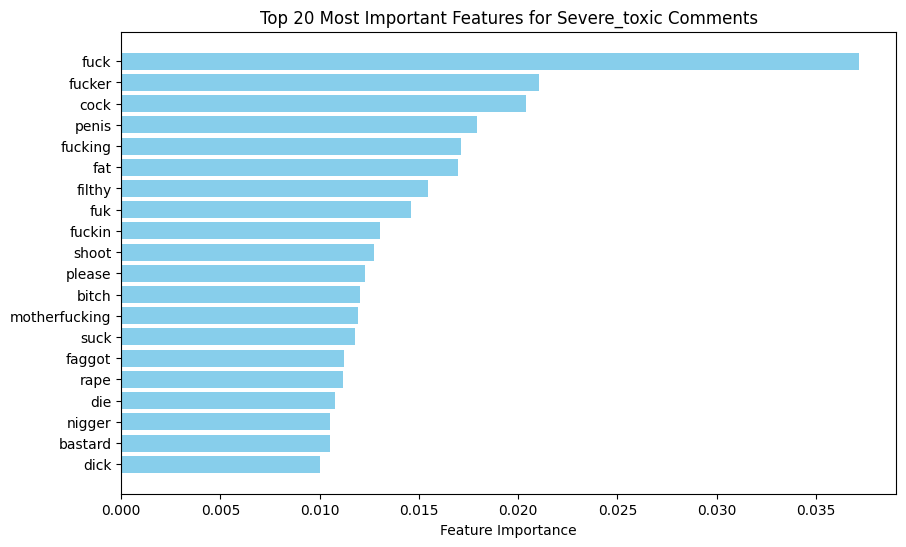


Feature Importance for Label: Obscene

Top Features:
fuck: 0.0511
fucking: 0.0302
faggot: 0.0275
suck: 0.0271
bitch: 0.0262
cunt: 0.0227
dick: 0.0212
asshole: 0.0211
shit: 0.0180
ass: 0.0178
fucker: 0.0178
penis: 0.0148
motherfucker: 0.0128
cock: 0.0124
fag: 0.0123
assholes: 0.0121
fuckin: 0.0121
fcking: 0.0120
pussy: 0.0110
fk: 0.0103


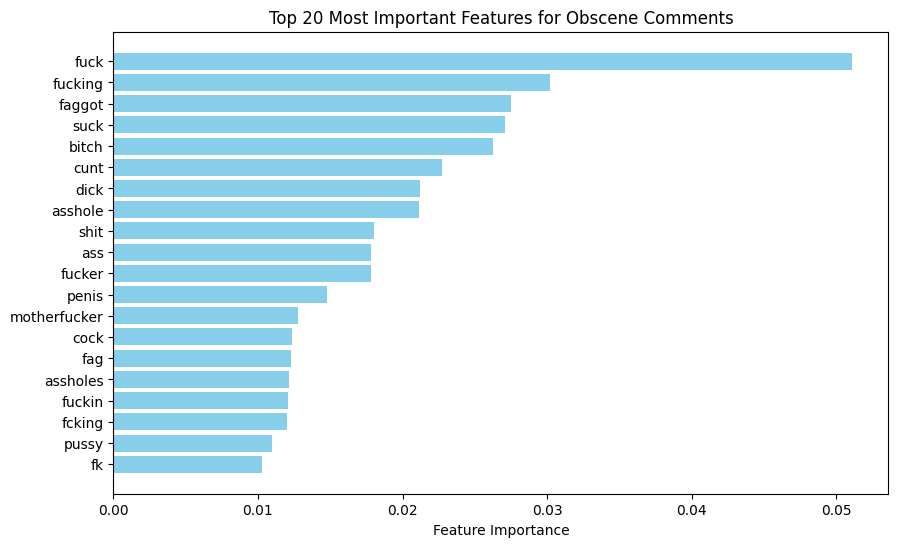


Feature Importance for Label: Threat

Top Features:
kill: 0.0410
die: 0.0276
wit: 0.0171
blood: 0.0170
punch: 0.0167
watch: 0.0167
raped: 0.0154
shot: 0.0145
death: 0.0144
ass: 0.0143
article: 0.0142
burn: 0.0141
cut: 0.0140
shoot: 0.0135
bastard: 0.0132
shall: 0.0131
fucking: 0.0130
beat: 0.0129
rape: 0.0126
alive: 0.0121


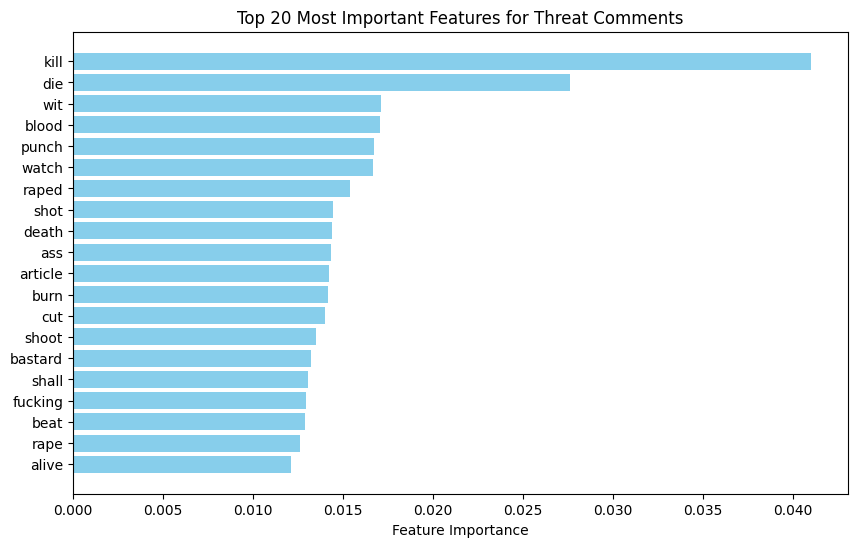


Feature Importance for Label: Insult

Top Features:
fuck: 0.0232
faggot: 0.0216
bitch: 0.0214
suck: 0.0177
cunt: 0.0168
fag: 0.0165
asshole: 0.0153
bastard: 0.0150
nigger: 0.0134
retard: 0.0133
pathetic: 0.0132
idiot: 0.0131
fucking: 0.0129
fucker: 0.0117
jerk: 0.0114
fat: 0.0108
ass: 0.0108
dick: 0.0107
ugly: 0.0104
article: 0.0104


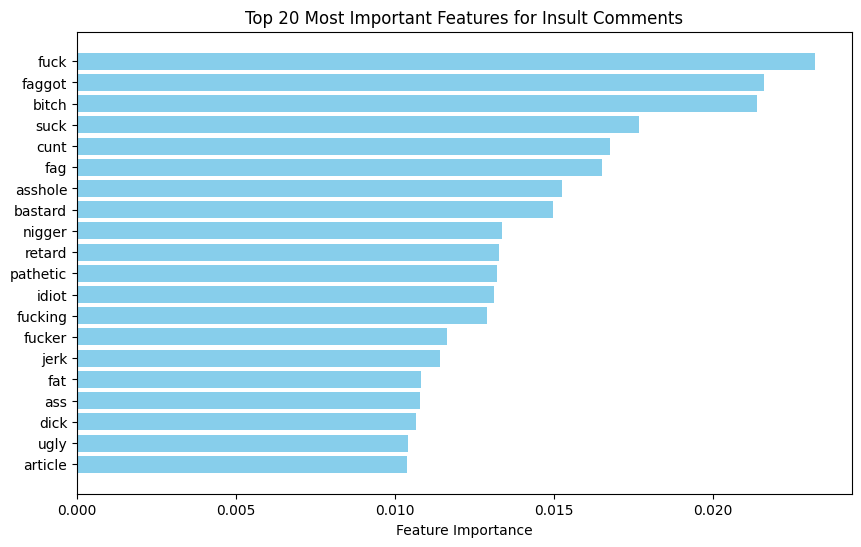


Feature Importance for Label: Identity_hate

Top Features:
nigger: 0.0306
gay: 0.0263
faggot: 0.0198
fat: 0.0197
niggers: 0.0187
nigga: 0.0177
bastard: 0.0174
scum: 0.0169
suck: 0.0167
homo: 0.0163
racist: 0.0157
fag: 0.0150
fuck: 0.0147
homosexuals: 0.0147
jew: 0.0141
faggots: 0.0134
homosexual: 0.0133
kill: 0.0111
nazi: 0.0108
lesbian: 0.0104


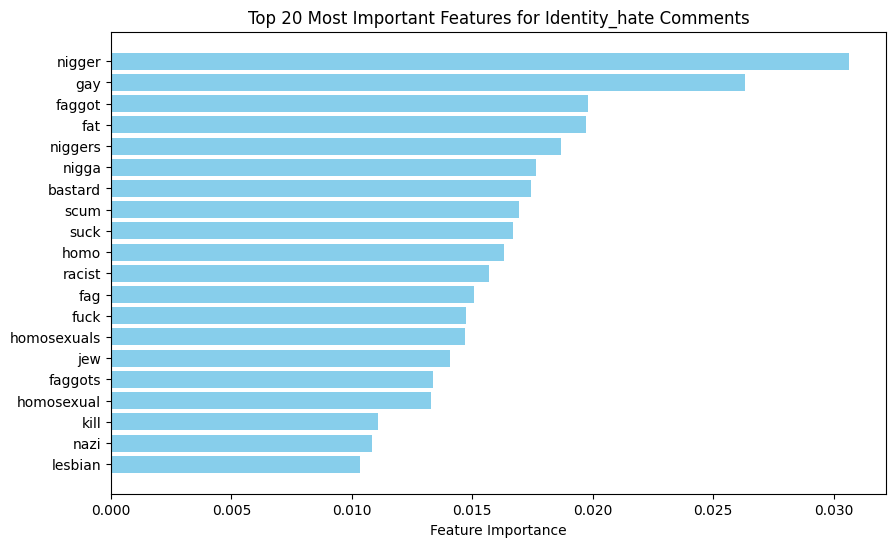

In [40]:
# Iterate over each label
for label in Label_columns:
    print(f"\nFeature Importance for Label: {label.capitalize()}\n")
    
    # Select the target
    y = df[label]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Train a new XGBoost model for each label
    model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        max_depth=6,
        learning_rate=0.1,
        n_estimators=100,
        random_state=42
    )
    model.fit(X_train, y_train)
    
    # Retrieve feature importances
    feature_importances = model.feature_importances_
    
    # Sort feature importances in descending order
    indices = np.argsort(feature_importances)[::-1]
    
    # Select top 20 features
    top_n = 20
    top_features = [(feature_names[i], feature_importances[i]) for i in indices[:top_n]]
    
    # Display the top features
    print("Top Features:")
    for word, importance in top_features:
        print(f"{word}: {importance:.4f}")
    
    # Plot the top features
    words, importances = zip(*top_features)
    plt.figure(figsize=(10, 6))
    plt.barh(words, importances, color='skyblue')
    plt.gca().invert_yaxis()  # Reverse the order to have the highest importance at the top
    plt.xlabel("Feature Importance")
    plt.title(f"Top 20 Most Important Features for {label.capitalize()} Comments")
    plt.show()
